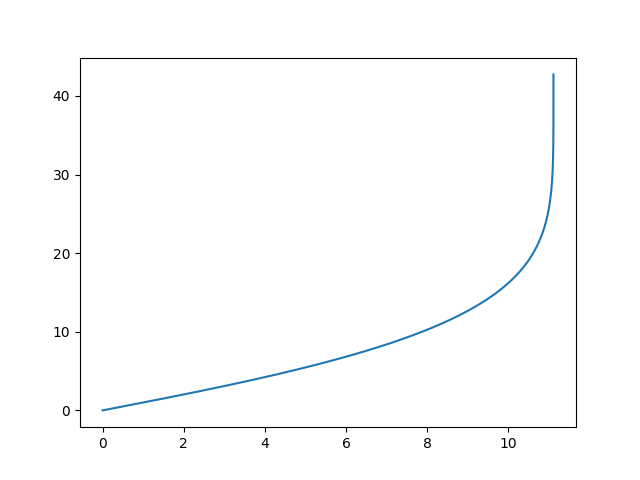

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

def process(A, B, xinit, xtarget,N):
    # x = [x, y, xd, yd]
    xl = [xinit]
    yl = [xinit[0:2]]
    x = xinit
    t = 0
    dt = 0.01
    for i in range(N):

        # err 
        u = xtarget - x[:2]
        xd = A@x + B@u

        x = x + xd*dt
        xl.append(x)
        y = x[0:2]

    return np.array(xl), np.array(yl)

xinit = np.array([0, 0, 0, 0])

kx = -5
ky = -1
cx = -5
cy = -5
A =  np.array([[0, 0, 1, 0],  [0, 0, 0, 1], [kx, 0, cx, 0], [0, ky, 0, cy]])
B  = 0.08*np.array([[1, 0], [0, 1], [0, 0], [0, 0]])
xl, yl = process(A, B, xinit, np.array([150, 150]), 2000)

np.array(xl)

plt.plot(xl[:, 0], xl[:, 1])


{'clicks': [], 'disp_x': [0.0, 0.0, 0.0, -5.44000005722046, -10.2271995544434, -14.222336769104, -17.3289680480957, -19.4939117431641, -20.7059020996094, -20.992696762085, -20.4168395996094, -43.6634902954102, -63.3038749694824, -78.8408737182617, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -70.0181503295898, -56.6636390686035, -42.1109466552734, -27.0380344390869, -12.089430809021, 2.14686131477356, 15.1583757400513, 26.522632598877, 35.9168472290039, 43.1228485107422, 48.0274543762207, 50.618595123291, 50.9777030944824, 49.2689743041992, 45.7261810302734, 40.637767791748, 37.6667442321777, 33.4267349243164, 28.1888561248779, 22.2424545288086, 15.8820667266846, 9.39522743225098, 3.05152654647827, -2.90673875808716, -8.27207279205322, -12.8772974014282, -16.5990104675293, -19.3590259552002, -21.1238803863525, -21.9025917053223, -21.7429008483887, -20.7262706756592, -18.9619197845459, -16.5802402496338, -13.725887298584, -10.5508460998535, -7.20777416229248, -3.84383797645569, -0.5

/tmp/ipykernel_23165/1046254843.py:46: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)


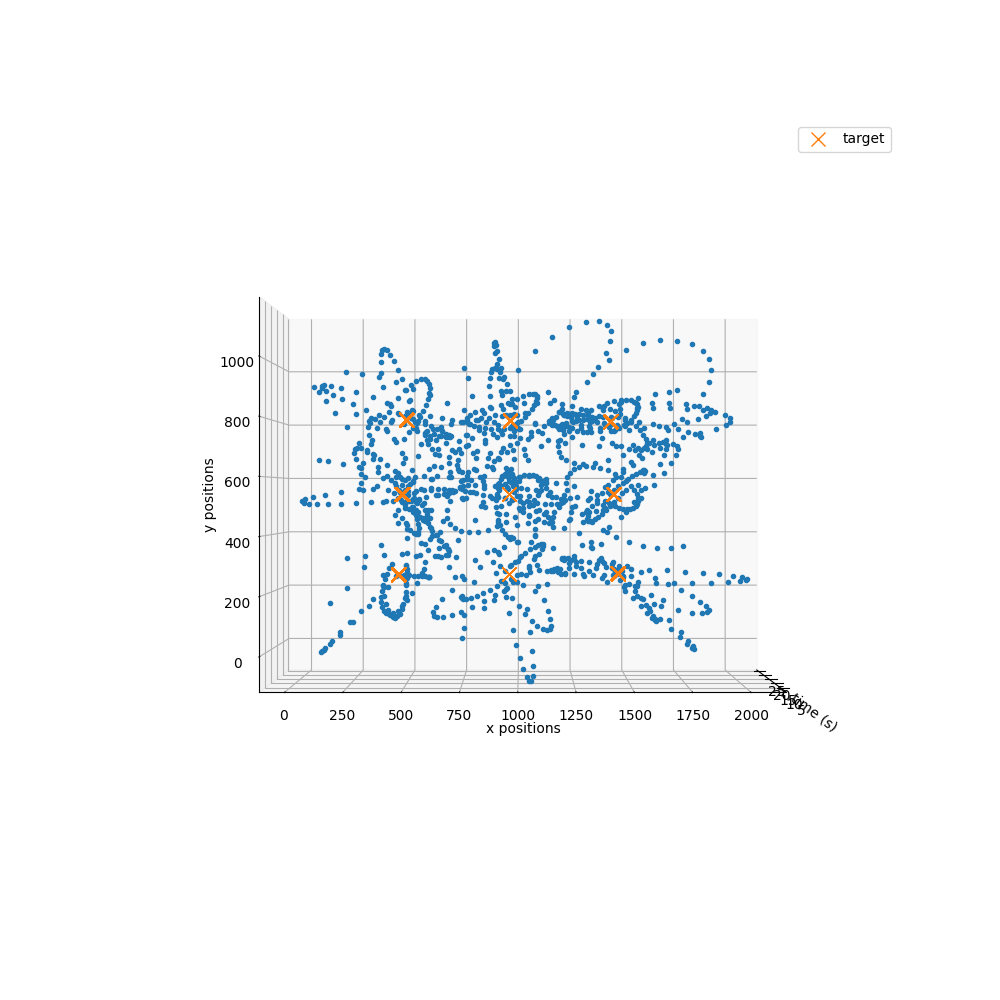

In [ ]:
import numpy as np
import json

logs_dir = "../logs/"
file = "human_trace_3x3_5h.log"
with open(logs_dir + "process_trace_3x3_5h.log", "r") as f:
# with open("gaming_trace_process_3x3_5h.log", "r") as f:

    data = json.load(f)
    print(data)

time = np.array(data['time'])



idx = np.where(time<0.1666)[0]


# time = np.diff(time[idx], prepend=0)
time = np.delete(time, idx)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(time/1e6, data["pos_x"], data["pos_y"], '.')
ax.set_xlabel("time (s)")
ax.set_ylabel("x positions")
ax.set_zlabel("y positions")


# ax = fig.add_subplot(212)
# ax.plot(data["disp_x"], data["disp_y"], '.')


disp_y = np.array(data["disp_y"])
disp_x = np.array(data["disp_x"])

idxs = np.where(np.sqrt(disp_y**2 + disp_x**2)<100)[0]

disp_x = disp_x[idxs]
disp_y = disp_y[idxs]

print("len disp_x : ", len(disp_x))
# ax.plot(disp_x, disp_y, '.')
x_target = data['target_x']
y_target = data['target_y']
plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)
len(x_target)
len(time)
ax.view_init(elev=0, azim=180, roll=0)
ax.yaxis.set_inverted(True)
ax.legend()
plt.show()

/tmp/ipykernel_12240/2182517651.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)


In [ ]:
data.keys()

dict_keys(['clicks', 'disp_x', 'disp_y', 'pos_x', 'pos_y', 'target_x', 'target_y', 'time'])